### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('../data/df_model_final_bryanbc_frequency_recency_playtime_songplay80pcnt_listenthrehold.csv')

In [3]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,song_play_80_pcnt_3,song_play_80_pcnt_7,song_play_80_pcnt_14,song_play_80_pcnt_30,listen_threhold_1,listen_threhold_3,listen_threhold_7,listen_threhold_14,listen_threhold_30,device_type
count,4.317830e+05,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,...,431783.000000,431783.000000,431783.00000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000,431783.000000
mean,1.669634e+08,0.270696,9.324494,28.748670,63.558292,134.748466,313.659123,0.298275,0.896747,2.075756,...,15.744066,34.417677,73.03215,163.273737,6.818603,21.193535,46.574867,99.013062,226.644560,1.820602
std,1.213354e+07,0.444320,24.717553,58.114771,109.340304,203.903974,399.449389,8.051736,10.887892,15.980681,...,35.086951,66.951553,127.12492,247.366983,16.693362,42.101375,80.294364,151.936400,296.364984,0.385570
min,1.233300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.679551e+08,0.000000,0.000000,0.000000,0.000000,8.000000,62.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,19.000000,0.000000,0.000000,0.000000,5.000000,42.000000,2.000000
50%,1.683425e+08,0.000000,0.000000,4.000000,21.000000,60.000000,175.000000,0.000000,0.000000,0.000000,...,1.000000,8.000000,24.00000,76.000000,0.000000,3.000000,15.000000,43.000000,125.000000,2.000000
75%,1.686937e+08,1.000000,8.000000,32.000000,78.000000,172.000000,403.000000,0.000000,0.000000,0.000000,...,16.000000,39.000000,88.00000,201.000000,6.000000,24.000000,57.000000,125.000000,287.000000,2.000000
max,1.692584e+08,1.000000,916.000000,1148.000000,1504.000000,2157.000000,3762.000000,1463.000000,1463.000000,1463.000000,...,463.000000,906.000000,1326.00000,2581.000000,461.000000,502.000000,953.000000,1408.000000,2847.000000,2.000000


In [4]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### Define Features and Target

In [5]:
selected_features = list(df.columns.values)

In [6]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'recency',
 'total_play_time_1',
 'total_play_time_3',
 'total_play_time_7',
 'total_play_time_14',
 'total_play_time_30',
 'song_play_80_pcnt_1',
 'song_play_80_pcnt_3',
 'song_play_80_pcnt_7',
 'song_play_80_pcnt_14',
 'song_play_80_pcnt_30',
 'listen_threhold_1',
 'listen_threhold_3',
 'listen_threhold_7',
 'listen_threhold_14',
 'listen_threhold_30',
 'device_type_1',
 'device_type_2']

In [7]:
X = df[selected_features]
y = df['label']

In [8]:
X.shape

(431783, 28)

In [9]:
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

#### Let's Train-test split the data!

In [10]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train model using sklearn

In [11]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Calculate the metric scores for the model

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [14]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### Logistic Regression

              train      test
metrics                      
AUC        0.810635  0.808696
Accuracy   0.734884  0.737462
Precision  0.827544  0.814304
Recall     0.028727  0.028007
f1-score   0.055527  0.054151


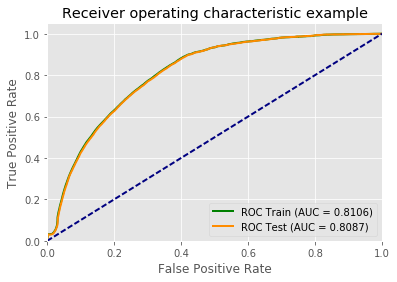

In [15]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.985003  0.981350
Accuracy   0.943079  0.935176
Precision  0.896206  0.882981
Recall     0.893682  0.874293
f1-score   0.894942  0.878616


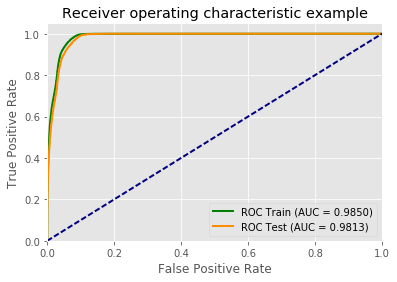

In [16]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

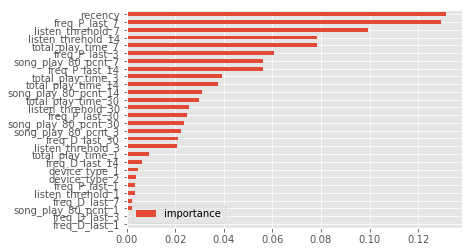

In [17]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.952132  0.949374
Accuracy   0.892136  0.888683
Precision  0.812576  0.803220
Recall     0.782998  0.775040
f1-score   0.797513  0.788878


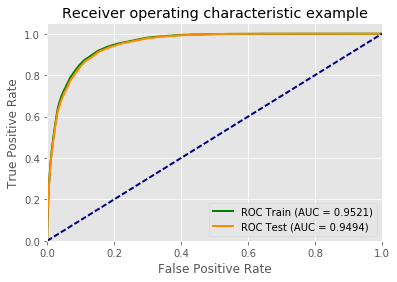

In [18]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

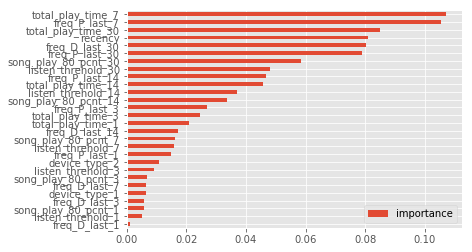

In [19]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Neural Network

              train      test
metrics                      
AUC        0.769488  0.766997
Accuracy   0.831373  0.830934
Precision  0.763686  0.756048
Recall     0.547984  0.546196
f1-score   0.638099  0.634214


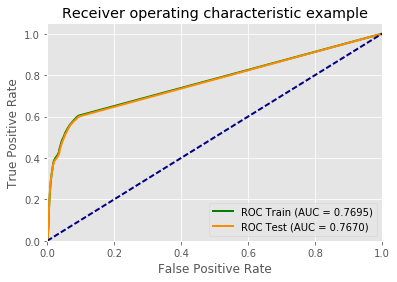

In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.999419  0.995765
Accuracy   0.987638  0.978438
Precision  0.957587  0.932992
Recall     0.998666  0.990808
f1-score   0.977695  0.961031


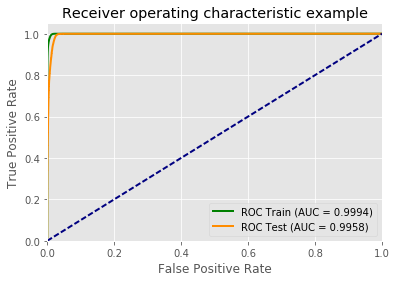

In [22]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

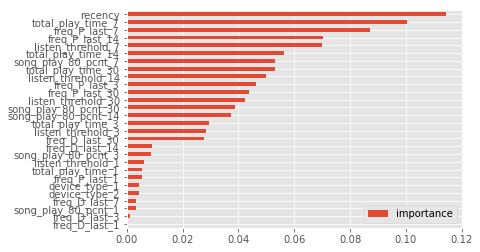

In [23]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()